In [1]:
# 파이썬의 대표적인 이미지 라이브러리
# PIL(Python Image Library), OpenCV(Computer Vision)
# https://homepages.cae.wisc.edu/~ece533/images/peppers.png

from PIL import Image
import os

img_path = os.getenv('HOME')+'/aiffel/pil_image/assets/peppers.png'
im = Image.open(img_path)
print(im)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x7F1EB4190650>


In [2]:
print(im)
print(im.format, im.size, im.mode)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x7F1EB4190650>
PNG (512, 512) RGB


In [3]:
print("이미지를 확인하세요.ᵕᴗᵕ")
im.show()

이미지를 확인하세요.ᵕᴗᵕ


In [6]:
x_pixel = 1
y_pixel = 2
xy = (x_pixel,y_pixel)
# getpixel(xy): 특정 좌표의 RGB값
print(im.getpixel(xy))
print(im.getdata())
# print(list(im.getdata()))

(185, 102, 50)


In [7]:
# 이미지 자르기
box = (100, 100, 400, 400)  # (x, y, x, y)
region = im.crop(box)
region.show()

In [11]:
resized_image = im.resize((100, 200))
resized_image.show()

In [14]:
# 이미지 회전하기
region = region.transpose(Image.ROTATE_180)
# region.rotate(180)와 동일
# transpose()의 인자
# FLIP_LEFT_RIGHT: 좌우반전
# FLIP_TOP_BOTTOM: 상하반전
# ROTATE_90: 시계 반대 방향 90도 회전
# ROTATE_180: 시계 반대 방향 180도 회전
# ROTATE_270: 시계 반대 방향 270도 회전
region.show()

In [15]:
# 이미지 합치기
im.paste(region, box)
im.show()

# im(원본이미지)에 region(회전시킨 이미지)를 box 범위에 합친다.

Text(0.5, 1.0, 'enhanced contrast')

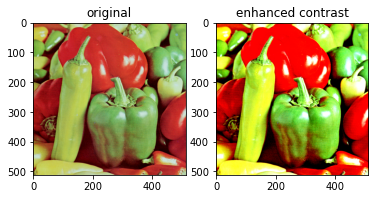

In [18]:
# 이미지 대비 변경, 대비란 한 물체와 다른 물체의 색과 밝기의 차이
from PIL import ImageEnhance
import matplotlib.pyplot as plt

img_path = os.getenv("HOME")+'/aiffel/pil_image/assets/peppers.png'
im = Image.open(img_path)

enh = ImageEnhance.Contrast(im)
enh = enh.enhance(1.9)

# 두 이미지 그리기
f=plt.figure()
im1 = f.add_subplot(1,2,1)
im1.imshow(im)
im1.set_title("original")

im2 = f.add_subplot(1,2,2)
im2.imshow(enh)
im2.set_title("enhanced contrast")

Text(0.5, 1.0, 'BLUR filter')

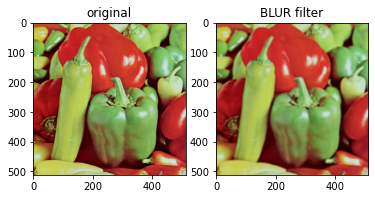

In [19]:
# 이미지 필터(Filter)
from PIL import ImageFilter

filtered_image = im.filter(ImageFilter.BLUR)  # BLUR filter 이미지

f=plt.figure()
im1 = f.add_subplot(1,2,1)
im1.imshow(im)
im1.set_title("original")

im2 = f.add_subplot(1,2,2)
im2.imshow(filtered_image)
im2.set_title("BLUR filter")

# 필터종류
# BLUR: 이미지를 흐리게 만든다.
# EDGE_ENHANCE: 윤곽을 뚜렷하게 해준다.
# EMBOSS: 원본이미지의 명암 경계에 따라 이미지의 각 픽셀을 밝은 영역 또는 어두운 영역으로 대체한다.
# FIND_EDGES: 윤곽만 표시한다.
# SHARPEN: 경계선들을 날카롭게 해준다. 선명도가 높아진다.
# https://pillow.readthedocs.io/en/latest/reference/ImageFilter.html

In [20]:
# 이미지 색공간 변경하기
greyscale_image = im.convert('L')
greyscale_image.show()
# 'L': 흑백 공간으로 변경
# 'RGB': 빨, 초, 파
# 'CMYK': 사이언, 마젠타, 노랑, 검정

In [21]:
# 이미지 저장하기
from PIL import Image
import os

original_img_path = os.getenv('HOME')+'/aiffel/pil_image/assets/peppers.png'
new_img_path = os.getenv('HOME')+'/aiffel/pil_image/assets/modified_peppers.jpg'

im = Image.open(original_img_path)
im.save(new_img_path)

new_im = Image.open(new_img_path)
print(new_im.format, new_im.size, new_im.mode)

JPEG (512, 512) RGB


In [22]:
# PNG 포맷으로 저장합니다. 
another_img_path = os.getenv('HOME')+'/aiffel/pil_image/assets/modified_peppers.png'
im.save(another_img_path)

another_im = Image.open(another_img_path)
print(another_im.format, another_im.size, another_im.mode)

PNG (512, 512) RGB


In [33]:
# 모듈로 만들어서 사용하기, xxxx.py

from PIL import Image, ImageFilter

def image_resize(image, height):
    if height != 300:
        image.resize((800, 600))
    else:
        image.resize((800, 300))
    return image
def image_rotate(image):
    image.rotate(180)
    return image
def image_change_bw(image):
    image.convert('L')
    return image

original_img_path = os.getenv('HOME')+'/aiffel/pil_image/assets/peppers.png'
im = Image.open(original_img_path)
image_330 = image_resize(im, 300)
image_330.resize((800, 300))
image_330.size

(512, 512)

In [23]:
# 모듈 테스트해보기

from PIL import Image
import os
import sys
sys.path.append(os.getenv('HOME')+'/aiffel/pil_image')    # 우리가 추가한 모듈의 path를 sys.path에 임시로 추가해 줍니다. 

import image_processing as ip      # 위 추가한 path에서 image_processing.py 모듈을 가져와 임포트합니다. 

original_img_path = os.getenv('HOME')+'/aiffel/pil_image/assets/test.jpg'
result_img_path = os.getenv('HOME')+'/aiffel/pil_image/assets/result_image.jpg'

def img_transfer(original_image, result_image):
    # 원본 이미지를 오픈합니다. 
    im = Image.open(original_image)

    # image_processing.image_resize 를 사용하여 (800,600)으로 resize합니다. 
    im_resized_600 = ip.image_resize(im, 600)
    # image_processing.image_resize 를 사용하여 (800,300)으로 resize합니다. 
    im_resized_300 = ip.image_resize(im, 300)

    # image_processing.image_rotate 를 사용하여 (800,300)짜리 이미지를 180도 회전합니다. 
    im_resized_300_rotate = ip.image_rotate(im_resized_300)

    # im_resized_600에 im_resized_300와 im_resized_300_rotate를 아래위로 붙입니다. 
    box_top = (0, 0, 800, 300)
    box_bottom = (0, 300, 800, 600)
    im_resized_600.paste(im_resized_300_rotate, box_top)
    im_resized_600.paste(im_resized_300, box_bottom)

    # image_processing.image_change_bw 를 사용하여 im_resized_600을 흑백으로 변환합니다.
    im_resized_600 = ip.image_change_bw(im_resized_600)

    # 이미지를 저장합니다. 
    im_resized_600.save(result_image)

# 함수를 호출해서 원본이미지를 새로운 이미지로 변환해서 저장해 봅시다.     
img_transfer(original_img_path, result_img_path)

# 만들어진 이미지를 화면에 출력해 봅시다. 
Image.open(result_img_path).show()

print("⁎ᵕᴗᵕ⁎")

ValueError: images do not match

In [25]:
# 이미지 애플리케이션

from tkinter import *
import tkinter.ttk as ttk
from tkinter import filedialog
from PIL import Image,ImageTk

print('코드 실행 중..🛸')
window = Tk()
window.title("나의 이미지 편집기")

window.geometry("1240x600")

label1 = Label(window, text="이미지 편집전")
label1.place(x=200, y=20)

window.filename = None

def click1():
    window.filename = filedialog.askopenfilename(initialdir="~", title="Select image file")
    if window.filename:
        img = Image.open(window.filename)
        img = img.resize((600, 450), Image.ANTIALIAS)
        img = ImageTk.PhotoImage(img)
        label3 = Label(window, image=img)
        label3.image = img
        label3.place(x=20, y=50)

action1 = ttk.Button(window, text="이미지 선택", command=click1)  
action1.place(x=200, y=520)

window.mainloop()
print('완료!')

코드 실행 중..🛸
완료!


In [28]:
from tkinter import *
import tkinter.ttk as ttk
from tkinter import filedialog
from PIL import Image,ImageTk

print('코드 실행 중..🛸')
window = Tk()
window.title("나의 이미지 편집기")

window.geometry("1240x600")

label1 = Label(window, text="이미지 편집전")
label2 = Label(window, text="이미지 편집후")
label1.place(x=200, y=20)
label2.place(x=800, y=20)

window.filename = None

def click1():
    window.filename = filedialog.askopenfilename(initialdir="~", title="Select image file")
    if window.filename:
        img = Image.open(window.filename)
        img = img.resize((600, 450), Image.ANTIALIAS)
        img = ImageTk.PhotoImage(img)
        label3 = Label(window, image=img)
        label3.image = img
        label3.place(x=20, y=50)

def click2():
    img_transfer(window.filename, 'result.png')
    img = Image.open('result.png')
    img = img.resize((600, 450), Image.ANTIALIAS)
    img = ImageTk.PhotoImage(img)
    label4 = Label(window, image=img)
    label4.image = img
    label4.place(x=620, y=50)


action1 = ttk.Button(window, text="이미지 선택", command=click1)  
action1.place(x=200, y=520)

action2 = ttk.Button(window, text="이미지 변환", command=click2)   
action2.place(x=800, y=520)


window.mainloop()
print('완료!')

코드 실행 중..🛸


Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-28-f8011c9fb776>", line 30, in click2
    img_transfer(window.filename, 'result.png')
  File "<ipython-input-23-d6dd4e08bb9c>", line 28, in img_transfer
    im_resized_600.paste(im_resized_300_rotate, box_top)
  File "/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/PIL/Image.py", line 1520, in paste
    self.im.paste(im, box)
ValueError: images do not match


완료!
